<a href="https://colab.research.google.com/github/gabrieleantonini00/Time-Series-Analysis/blob/main/BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
# Load data
bitcoin = pd.read_excel('BitcoinPrice17-6-23-18-6-22.xlsx', header=0)
dat = pd.date_range('2017-06-23', periods=len(bitcoin), freq='D')
bitcoin.index = dat
price = bitcoin['ClosingP']

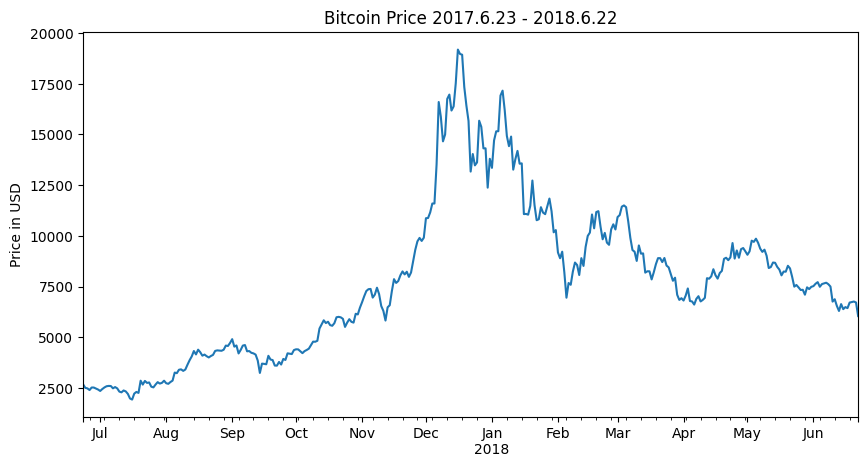

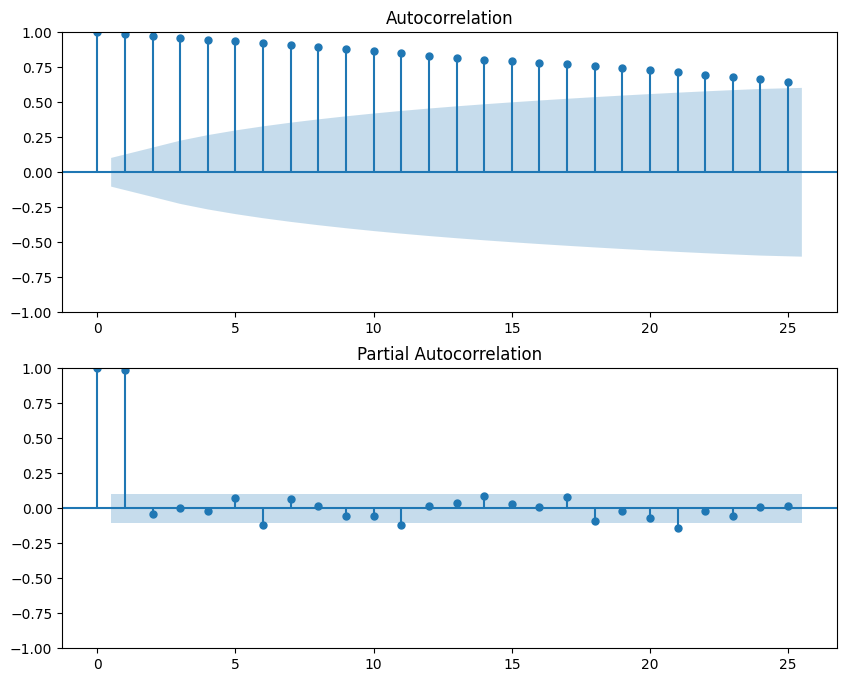

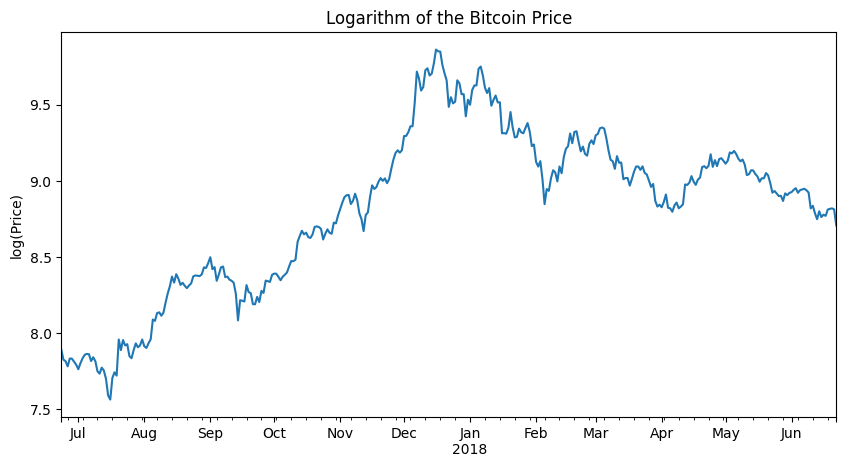

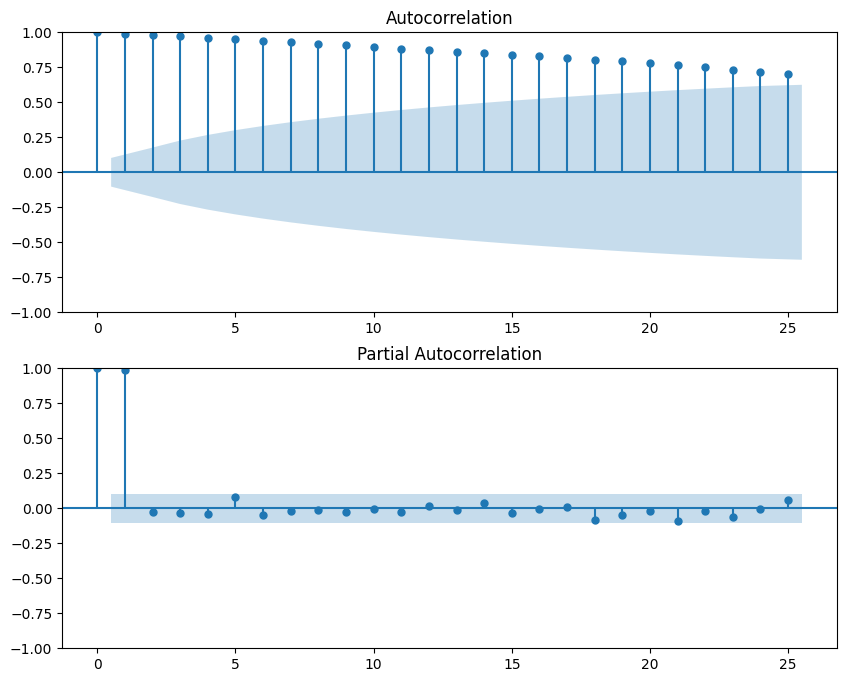

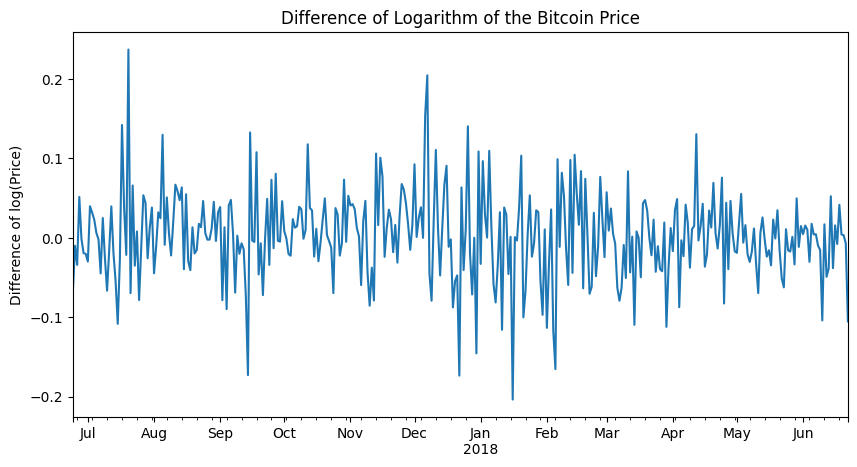

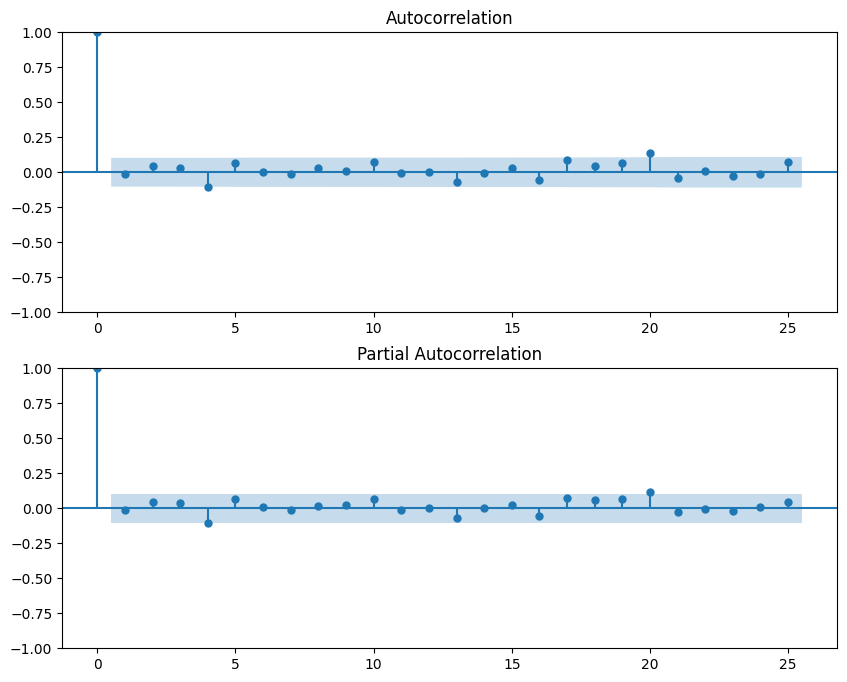

In [10]:
# Plot original Bitcoin price
plt.figure(figsize=(10, 5))
price.plot()
plt.title('Bitcoin Price 2017.6.23 - 2018.6.22')
plt.ylabel('Price in USD')
plt.savefig('BTC_Fig_Price.png', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

# ACF and PACF for original price
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(price, lags=25, ax=ax[0])
plot_pacf(price, lags=25, ax=ax[1])
plt.savefig('BTC_Fig_ACF_PACF_Price.png', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

# Logarithm of Bitcoin price
logp = np.log(price)
plt.figure(figsize=(10, 5))
logp.plot()
plt.title('Logarithm of the Bitcoin Price')
plt.ylabel('log(Price)')
plt.savefig('BTC_Fig_LogPrice.png', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

# ACF and PACF for log price
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(logp, lags=25, ax=ax[0])
plot_pacf(logp, lags=25, ax=ax[1])
plt.savefig('BTC_Fig_ACF_PACF_LogPrice.png', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

# Difference of log price (returns)
dlogp = logp.diff().dropna()
plt.figure(figsize=(10, 5))
dlogp.plot()
plt.title('Difference of Logarithm of the Bitcoin Price')
plt.ylabel('Difference of log(Price)')
plt.savefig('BTC_Fig_DiffLogPrice.png', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

# ACF and PACF for differenced log price
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(dlogp, lags=25, ax=ax[0])
plot_pacf(dlogp, lags=25, ax=ax[1])
plt.savefig('BTC_Fig_ACF_PACF_DiffLogPrice.png', dpi=1200, bbox_inches='tight', transparent=True)
plt.show()


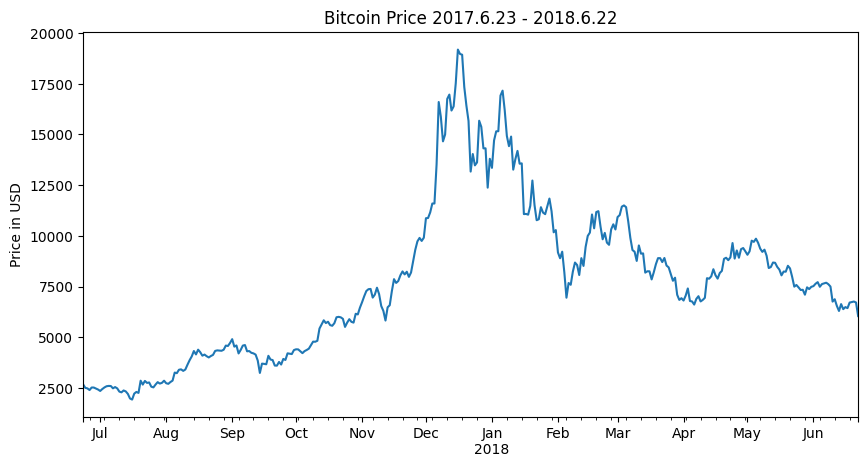

ACF/PACF with PythonTsa
ACF/PACF with statsmodels


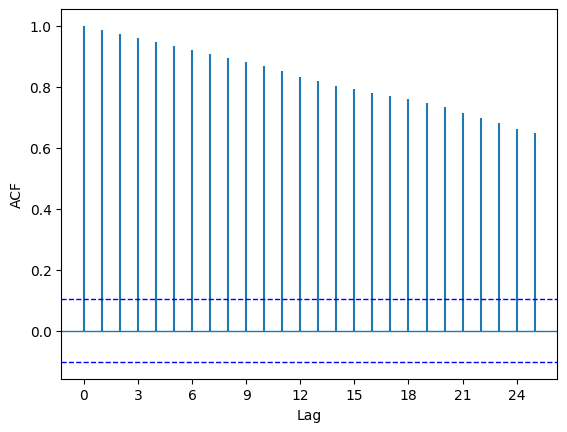

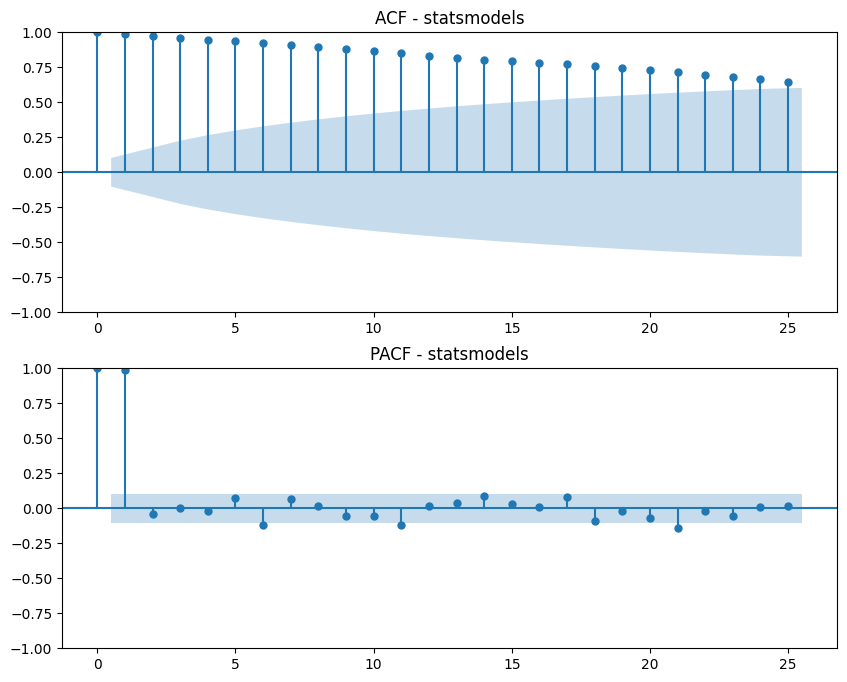

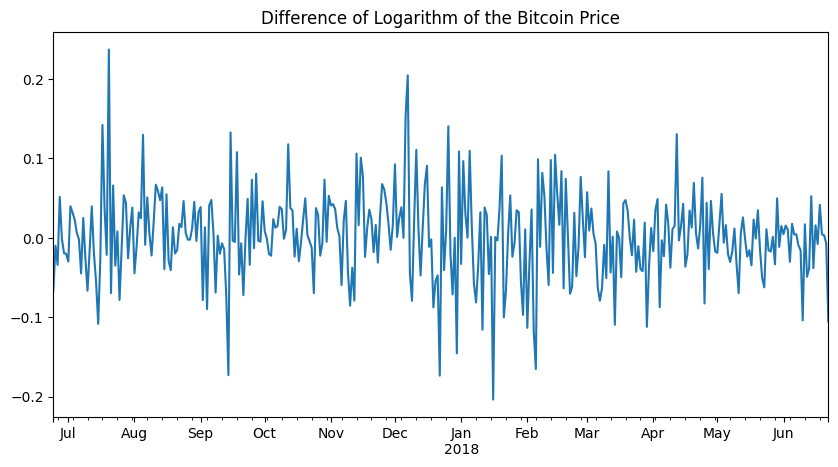

ACF/PACF of returns with PythonTsa
ACF/PACF of returns with statsmodels


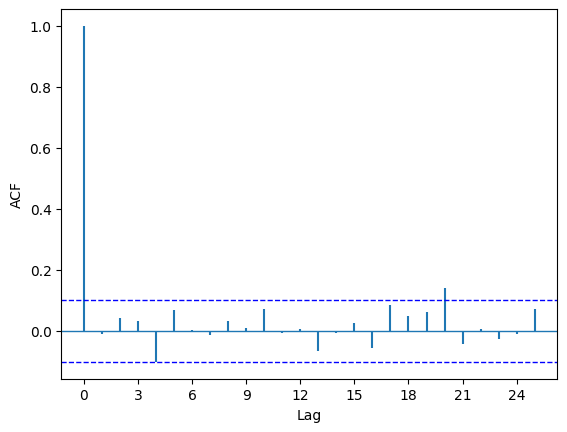

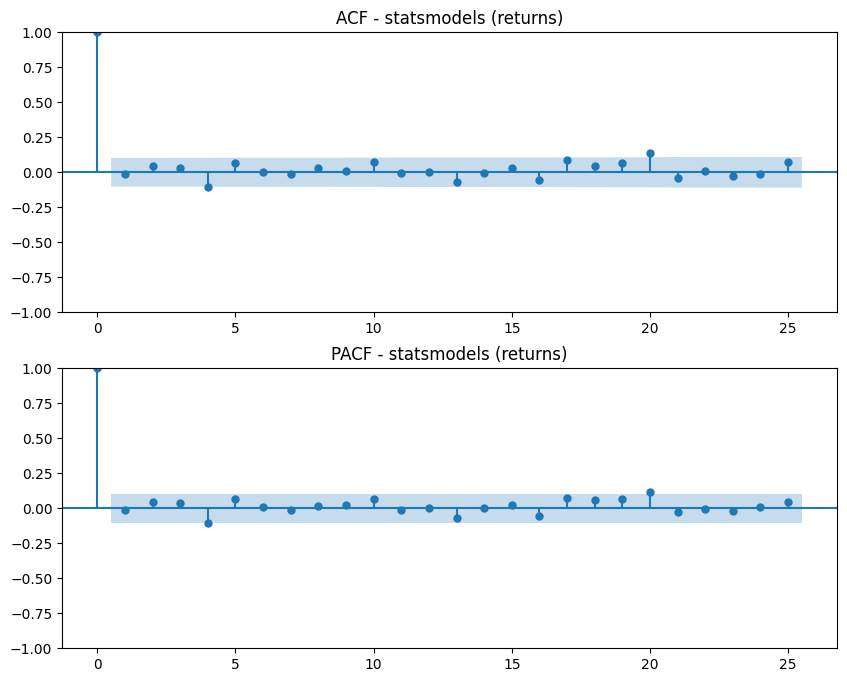

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Original TSA library
from PythonTsa.plot_acf_pacf import acf_pacf_fig

# Statsmodels library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load data
bitcoin = pd.read_excel('BitcoinPrice17-6-23-18-6-22.xlsx', header=0)
dat = pd.date_range('2017-06-23', periods=len(bitcoin), freq='D')
bitcoin.index = dat
price = bitcoin['ClosingP']

# Plot the original series
plt.figure(figsize=(10,5))
price.plot()
plt.title('Bitcoin Price 2017.6.23 - 2018.6.22')
plt.ylabel('Price in USD')
plt.show()

# ===============================
# ACF/PACF using PythonTsa
# ===============================
print("ACF/PACF with PythonTsa")
acf_pacf_fig(price, lag=25)  # TSA plot

# ===============================
# ACF/PACF using statsmodels
# ===============================
print("ACF/PACF with statsmodels")
fig, ax = plt.subplots(2,1, figsize=(10,8))
plot_acf(price, lags=25, ax=ax[0], alpha=0.05)  # alpha sets 95% confidence interval
ax[0].set_title("ACF - statsmodels")
plot_pacf(price, lags=25, ax=ax[1], alpha=0.05)
ax[1].set_title("PACF - statsmodels")
plt.show()

# ===============================
# Log of prices and differences (returns)
# ===============================
logp = np.log(price)           # Natural logarithm of price
dlogp = logp.diff().dropna()   # First difference of log(price) to get returns

# Plot the returns
plt.figure(figsize=(10,5))
dlogp.plot()
plt.title('Difference of Logarithm of the Bitcoin Price')
plt.show()

# ACF/PACF of returns
# TSA
print("ACF/PACF of returns with PythonTsa")
acf_pacf_fig(dlogp, lag=25)

# statsmodels
print("ACF/PACF of returns with statsmodels")
fig, ax = plt.subplots(2,1, figsize=(10,8))
plot_acf(dlogp, lags=25, ax=ax[0], alpha=0.05)
ax[0].set_title("ACF - statsmodels (returns)")
plot_pacf(dlogp, lags=25, ax=ax[1], alpha=0.05)
ax[1].set_title("PACF - statsmodels (returns)")
plt.show()


In [12]:
from statsmodels.tsa.stattools import acf, pacf
import pandas as pd
import numpy as np

# Compute ACF and PACF values with 95% confidence intervals
acf_vals, acf_ci = acf(dlogp, nlags=25, alpha=0.05)
pacf_vals, pacf_ci = pacf(dlogp, nlags=25, alpha=0.05, method='ywm')

# Create a table
table = pd.DataFrame({
    'Lag': np.arange(len(acf_vals)),
    'ACF': acf_vals,
    'ACF_Lower_95%': acf_ci[:,0],
    'ACF_Upper_95%': acf_ci[:,1],
})

# Display the table
pd.set_option('display.float_format', '{:.4f}'.format)
print(table)

    Lag     ACF  ACF_Lower_95%  ACF_Upper_95%
0     0  1.0000         1.0000         1.0000
1     1 -0.0115        -0.1142         0.0913
2     2  0.0429        -0.0599         0.1456
3     3  0.0332        -0.0698         0.1361
4     4 -0.1017        -0.2047         0.0013
5     5  0.0683        -0.0358         0.1724
6     6  0.0035        -0.1010         0.1081
7     7 -0.0150        -0.1196         0.0896
8     8  0.0322        -0.0724         0.1368
9     9  0.0111        -0.0936         0.1158
10   10  0.0723        -0.0324         0.1770
11   11 -0.0063        -0.1116         0.0989
12   12  0.0052        -0.1001         0.1104
13   13 -0.0663        -0.1715         0.0390
14   14 -0.0074        -0.1130         0.0983
15   15  0.0271        -0.0786         0.1328
16   16 -0.0576        -0.1633         0.0482
17   17  0.0854        -0.0207         0.1915
18   18  0.0484        -0.0584         0.1552
19   19  0.0633        -0.0438         0.1703
20   20  0.1408         0.0334    